In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

from src.model import UNet
from src.dataset import get_load_data

c:\Users\neoce\miniconda3\envs\pytorch-cpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
unet_model = UNet(num_classes=20)
train, test = get_load_data(root = "../../data", dataset = "VOCSegmentation", download = False)  
img, smnt = train[0] 
img = img.reshape(1, 3, 572, 572)

In [15]:
smnt = smnt.resize((388, 388))

In [53]:
import torch
import numpy as np
smnt = torch.tensor(np.asarray(smnt), dtype = torch.float32).reshape(1, 1, 388, 388)

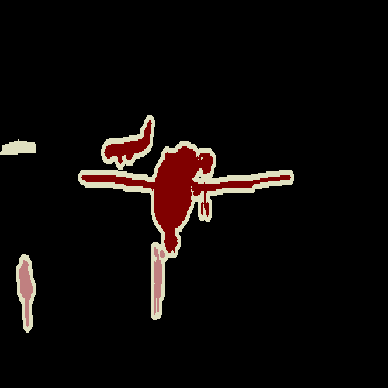

In [16]:
smnt

In [21]:
pred = unet_model(img)

In [43]:
pred_argmax = pred.argmax(dim = 1) + 1

In [56]:
pred_argmax = pred_argmax.dtype(torch.float32)

torch.int64

In [55]:
loss = torch.nn.CrossEntropyLoss(reduction='none')(pred_argmax, smnt)
loss = torch.mean(loss)

RuntimeError: "softmax_kernel_impl" not implemented for 'Long'